# EDA of Customer Churn using python 

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

## Reading CSV file 'Customer-Churn.csv'

In [2]:
df=pd.read_csv('Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Displaying few rows of datasets

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Getting summary of Data frame structure like column name, no. of not null column,datatype nd memory usages

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Column 'TotalCharges' contain object Dtype, it has  numerical value & has to be float Dtype, so identifying that due to null value it datatype is object so replacing it with 0 and then converting it into float

In [5]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype("float64")

In [6]:
 df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## After conversion 'TotalCharges' from object to float

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## To check if the column conatin null value or not 

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Getting the Summary of statistics of numerical column in datasets

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Function to convert SeniorCitizencolumn value

In [10]:
def conv(value):
    if value == 1:
        return 'Yes'
    else :
        return 'No'

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

## Checking that SeniorCitizen value had converted

In [11]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Visualization 

## Finding Reason why Customer has Churned

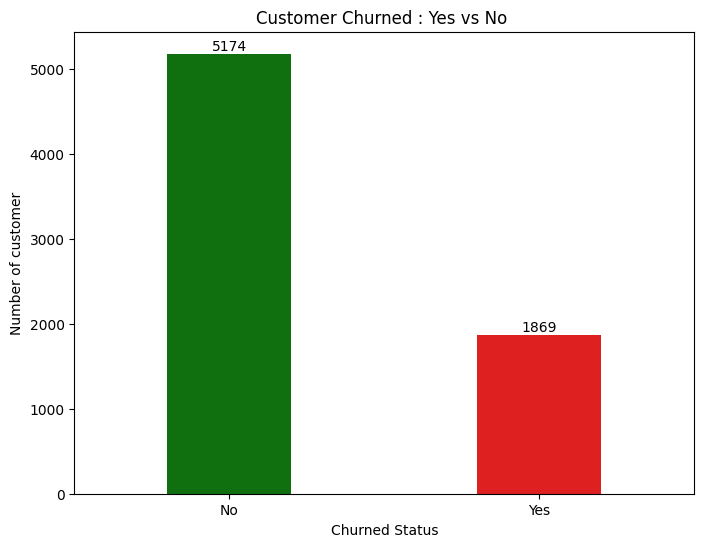

In [12]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Churn', data=df, hue='Churn',palette=['g','r'],width=0.4)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Customer Churned : Yes vs No ')
plt.xlabel('Churned Status')
plt.ylabel('Number of customer')
plt.show()

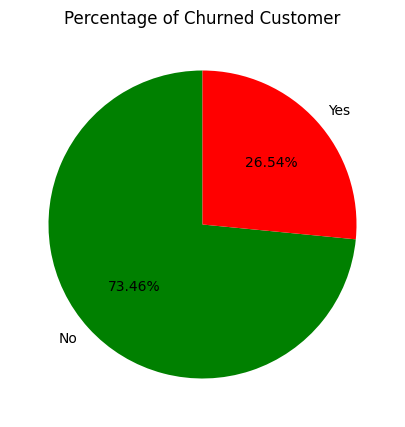

In [13]:
plt.figure(figsize=(8,5))
gb=df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%',colors=['g','r'],startangle=90)
plt.title('Percentage of Churned Customer')
plt.show()

In [ ]:
## 26.54% of the Customer Churned

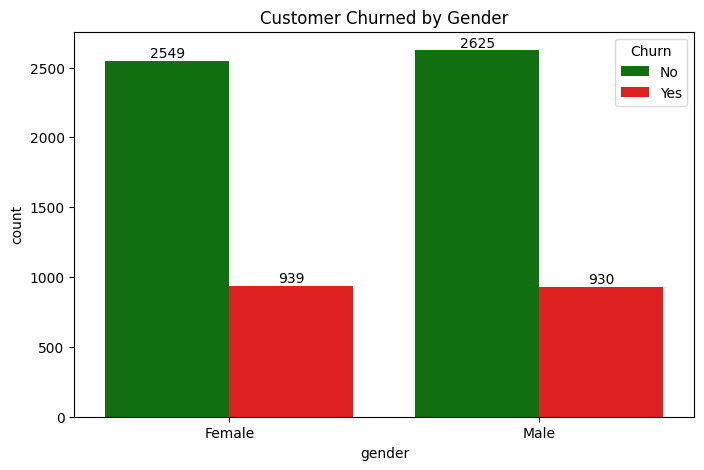

In [14]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='gender', data=df, hue='Churn', palette=['g','r'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Customer Churned by Gender')
plt.show()

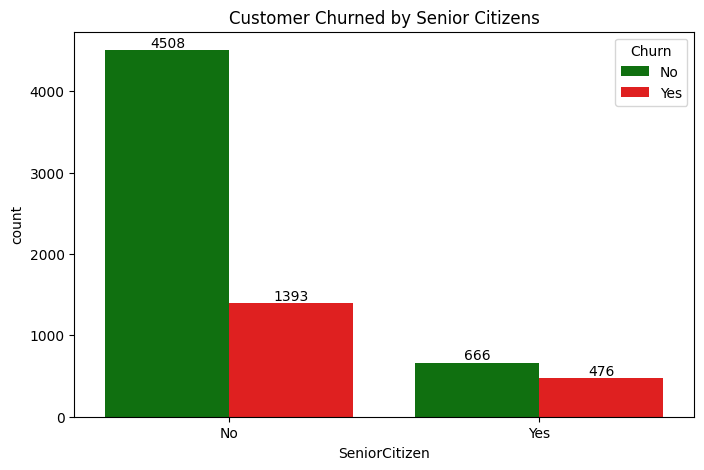

In [15]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='SeniorCitizen',data = df, hue='Churn',palette=('g','r'))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Customer Churned by Senior Citizens')
plt.show()

In [ ]:
## Senior Citizens have higer rate of churned rate as compared to non-Senior Citizens 

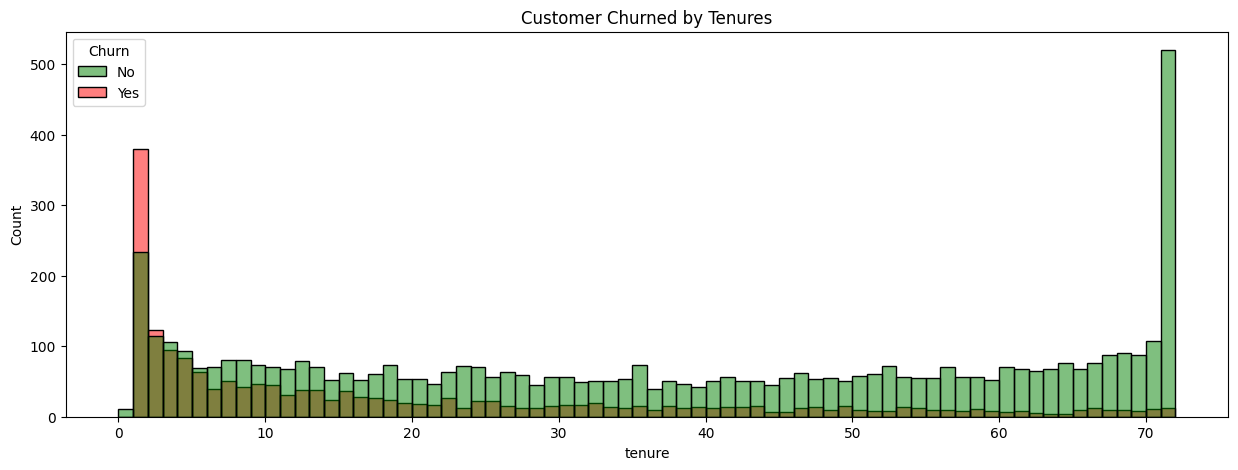

In [16]:
plt.figure(figsize=(15,5))
ax=sns.histplot(x='tenure', data=df,hue='Churn', palette=['g','r'],bins=72)
 

plt.title('Customer Churned by Tenures')
plt.show()

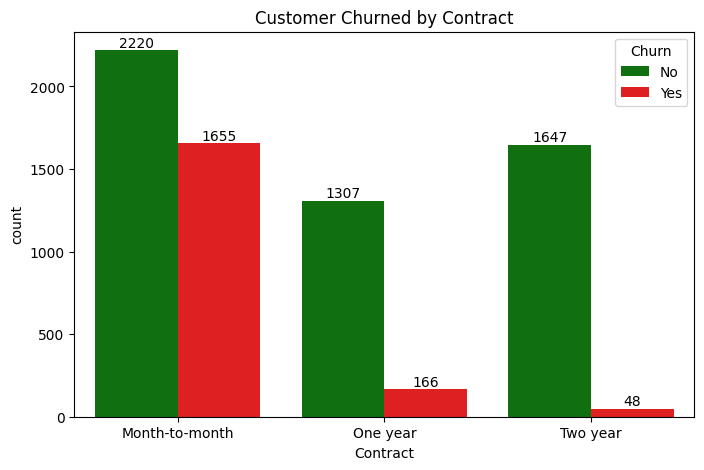

In [17]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='Contract', data=df, hue='Churn', palette=['g','r'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Customer Churned by Contract')
plt.show()

In [ ]:
## month to month contract have higher rate of churning than year wise contract

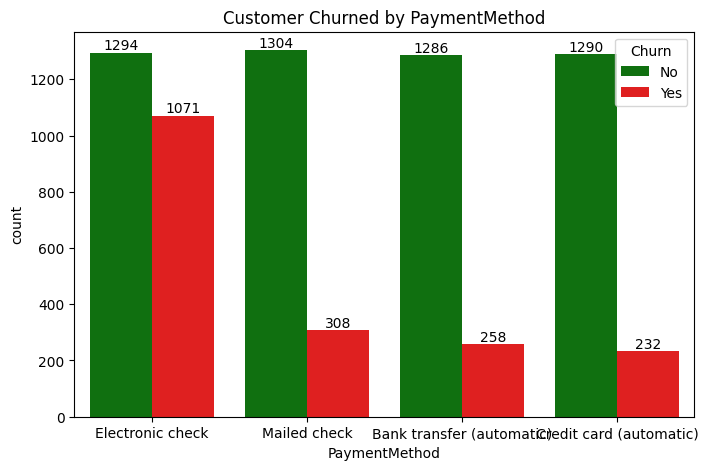

In [18]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='PaymentMethod', data=df, hue='Churn', palette=['g','r'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Customer Churned by PaymentMethod')
plt.show()

##  Electronic check have more churning than automatic payment method

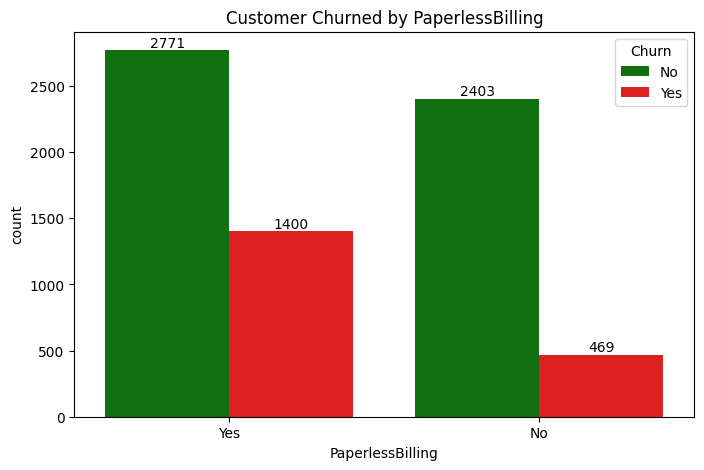

In [19]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='PaperlessBilling', data=df, hue='Churn', palette=['g','r'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Customer Churned by PaperlessBilling')
plt.show()

## Paperless Billing have more churning than paper billing

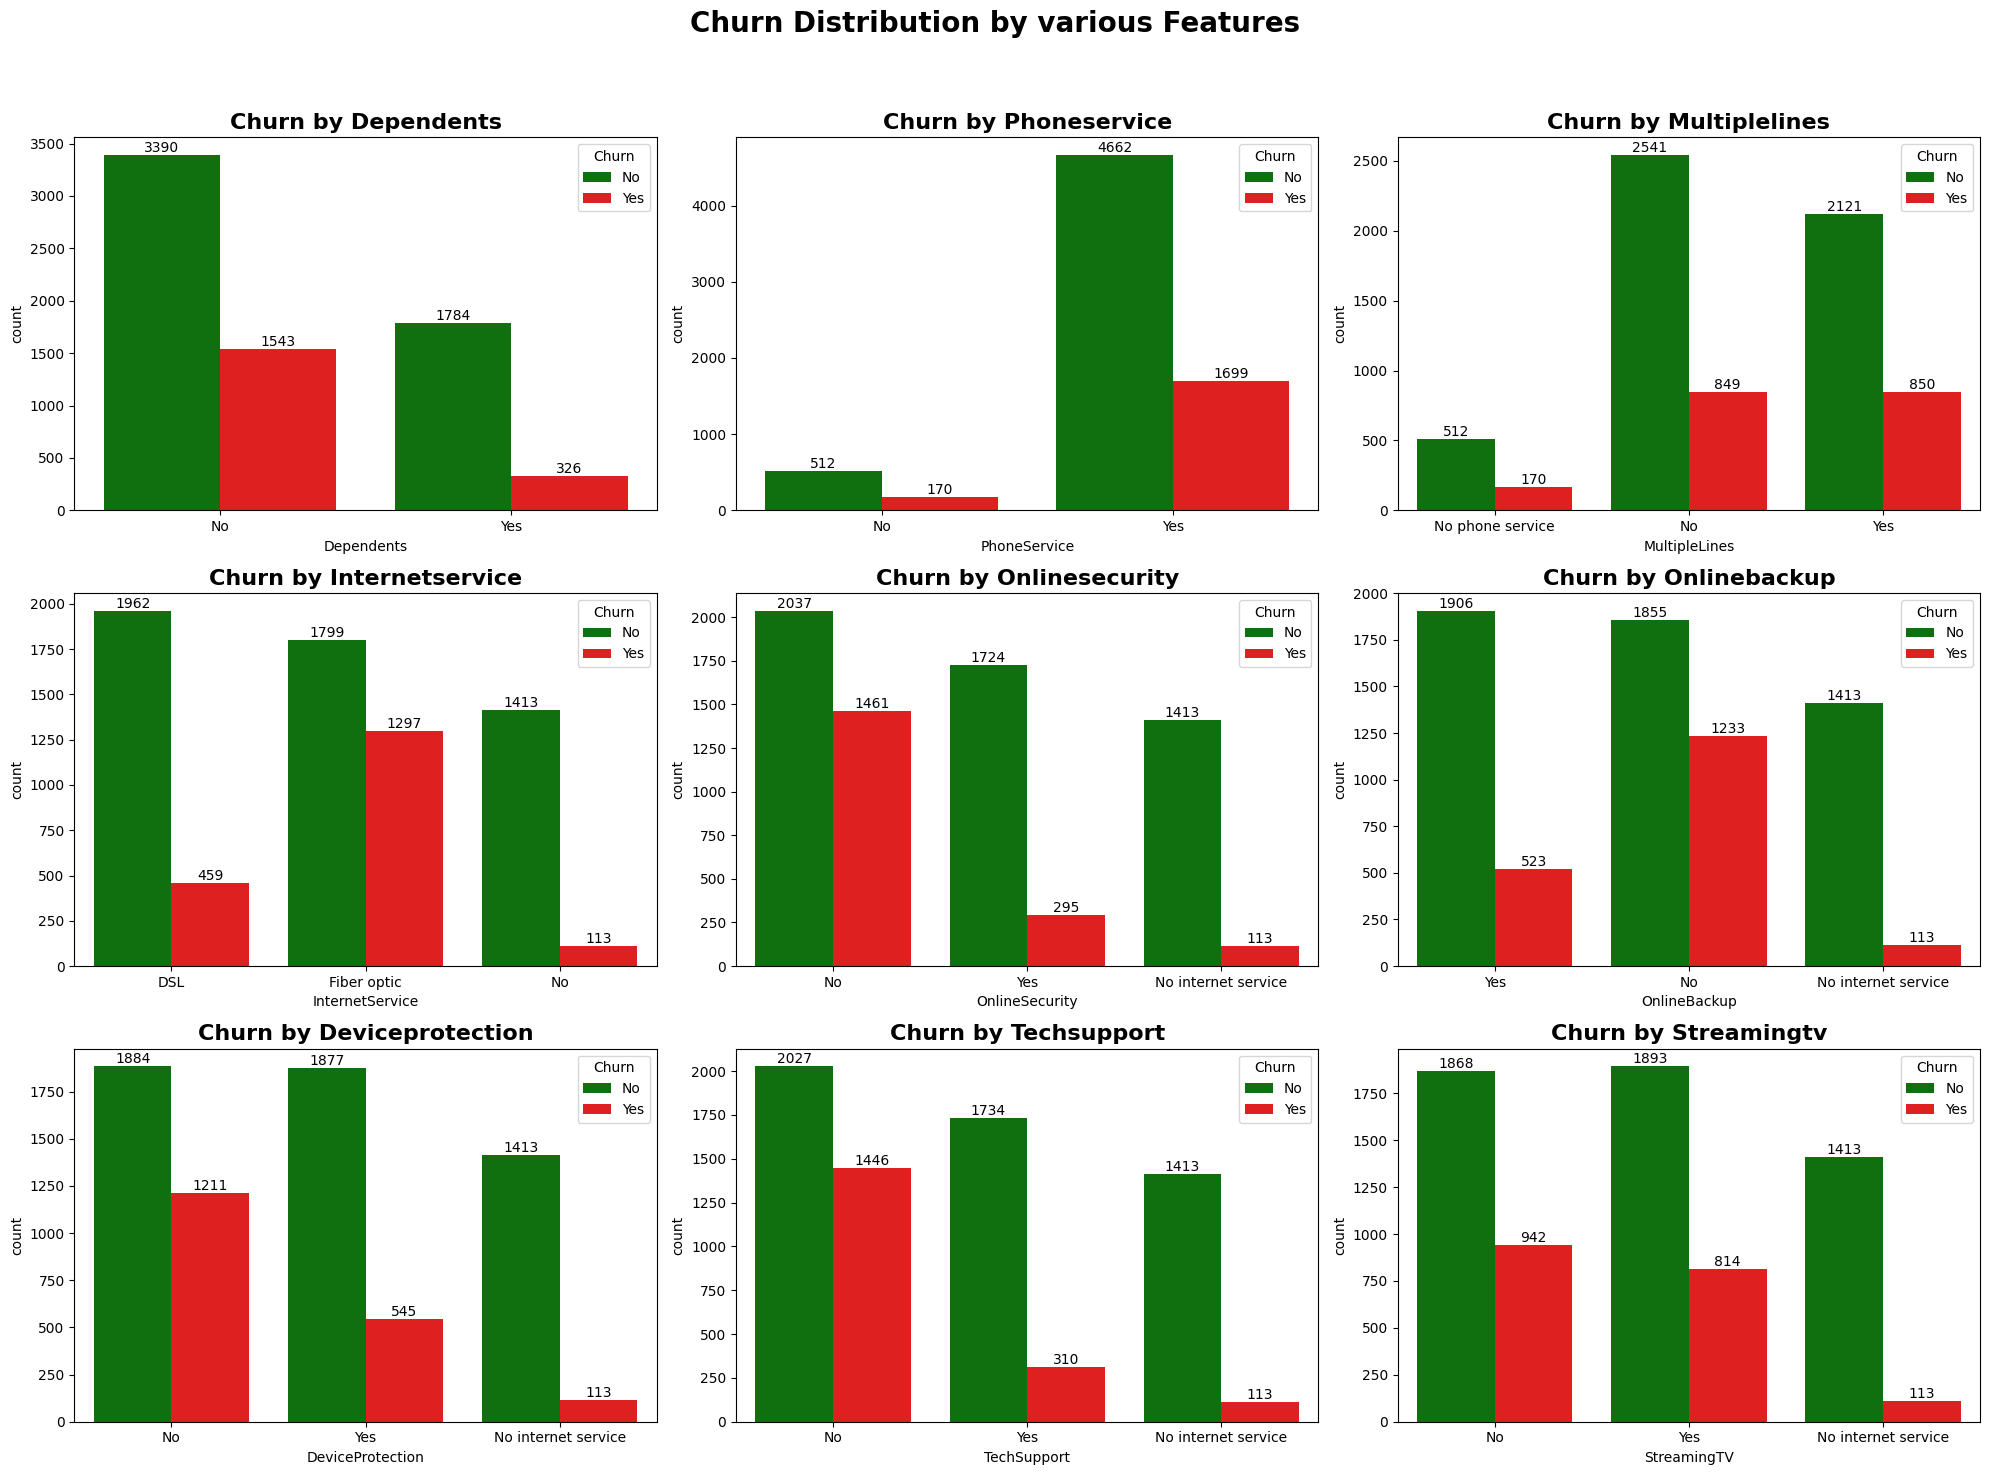

In [34]:
 
columns = ['Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV']
nrows=3
ncols=3
fig,axes= plt.subplots(nrows, ncols, figsize=(20,15))
fig.suptitle('Churn Distribution by various Features', fontsize=20,fontweight='bold')
axes=axes.flatten()
for i,column in enumerate(columns):
    bx=sns.countplot(data=df,x=column, ax=axes[i],hue='Churn', palette=['g','r'])
    bx.bar_label(bx.containers[0])
    bx.bar_label(bx.containers[1])
    axes[i].set_title(f'Churn by {column.capitalize()}', fontsize=16,fontweight='bold')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('count')
for j in range(len(columns), nrows*ncols):
    fig.delaxes(axes[j])
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

## customers who lack supplementary services are at higher risk of churning like dependents, multiplelines, online security, backup, device protection & techsupport re more likely to churn.

# INSIGHTS

## Service Features:

Dependents: Customers without dependents churn more.

Multiple Lines: Higher churn for customers with multiple lines.

Internet Service: Fiber optic users churn more than DSL users.

Online Services: Higher churn without online security, backup, device protection, and tech support.

Streaming: No streaming services lead to higher churn.


## Demographics:

Senior Citizens: Higher churn rate among senior citizens.

Gender: Equal churn rates between male and female.


## Contract and Payment:

Tenure: High churn in month 1.

Contract Type: Month-to-month contracts have higher churn.

Payment Method: Electronic payments have more churn than other methods.

Billing: Paperless billing shows higher churn. 

# RECOMMENDATIONS

### 1. Enhance Service Add-Ons: Focus on online security, backup, tech support, and streaming services.


### 2. Target Senior Citizens: Develop retention strategies for senior citizens.


### 3. Improve Onboarding: Reduce churn in the first month through better onboarding.


### 4. Long-Term Contracts: Encourage longer-term contracts to reduce churn.


### 5. Optimize Payments: Review electronic payment methods to minimize churn.


### 6. Incentivize Billing: Offer retention incentives for paperless billing customers.